<a href="https://colab.research.google.com/github/jlazo3010/An-lisis_datos/blob/main/Copia_de_Pogresovacuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as tkr 
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
import math as mt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machinelearning/progreso_vacunacion.csv')

In [ ]:
df.head()

,Country,Doses Administered,Doses per 1000,Fully Vaccinated Population (%),Vaccine being used in a country
0,Democratic Republic of Congo,73764,0.9,0.0,Oxford/AstraZeneca
1,World,3755683809,494.5,13.7,NaN
2,India,417851151,308.9,6.5,"Covaxin, Oxford/AstraZeneca, Sputnik V"
3,United States,339102867,1036.5,49.5,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
4,Brazil,128381812,612.9,17.1,"Johnson&Johnson, Oxford / AstraZeneca, Oxford/..."


In [ ]:
df.columns

Index(['Country', 'Doses Administered', 'Doses per 1000',
       'Fully Vaccinated Population (%)', 'Vaccine being used in a country'],
      dtype='object')

In [ ]:
columnas = ['pais','dosis_administradas','dosis_por_1000','porcentaje_de_vacunados','vacuna_utilizada']

In [ ]:
df.columns = columnas #Cambiamos de nombre las columnas

In [ ]:
df.dtypes #Analizamos los tipos de datos

pais                        object
dosis_administradas          int64
dosis_por_1000             float64
porcentaje_de_vacunados    float64
vacuna_utilizada            object
dtype: object

In [ ]:
df.describe()

,dosis_administradas,dosis_por_1000,porcentaje_de_vacunados
count,1.860000e+02,186.000000,186.000000
mean,3.214473e+07,522.919355,21.375269
std,2.777690e+08,466.466904,22.215737
min,1.306000e+03,0.900000,0.000000
25%,1.402410e+05,95.525000,2.475000
50%,1.084700e+06,406.450000,12.950000
75%,6.782513e+06,897.275000,36.325000
max,3.755684e+09,2320.200000,115.500000


In [ ]:
Na = []
for i in columnas:
  x = pd.isnull(df[str(i)]).values.ravel().sum()
  Na.append(x)
print('Hay un total de ' + repr(pd.array(Na).sum())  + ' valores Na en este dataset') 
 
#Corroborar si el dataframe tiene NA´s

Hay un total de 1 valores Na en este dataset


In [ ]:
df_sna = df.dropna(axis=0, how='any') #Creamos un nuevo df sin filas que tengan Na

In [ ]:
Na = []
for i in columnas:
  x = pd.isnull(df_sna[str(i)]).values.ravel().sum()
  Na.append(x)
print('Hay un total de ' + repr(pd.array(Na).sum())  + ' valores Na en este dataset') 
 
#Corroborar si el dataframe tiene NA´s

Hay un total de 0 valores Na en este dataset


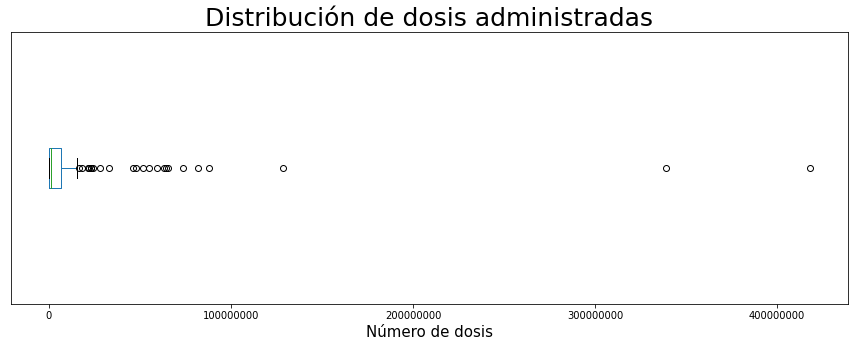

In [ ]:
plt.figure(figsize=(15,5))
df_sna['dosis_administradas'].plot(kind='box', vert=False)
plt.title('Distribución de dosis administradas',fontsize = 25)
plt.xlabel("Número de dosis", fontsize = 15)
plt.yticks([])
plt.ticklabel_format(style="plain", axis="x")

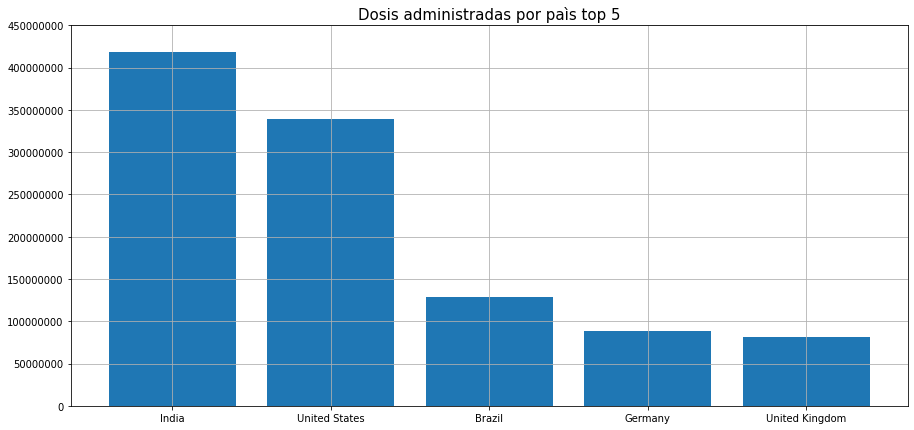

In [ ]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.bar(df_sna.sort_values('dosis_administradas',ascending=False).iloc[0:5,0],df_sna.sort_values('dosis_administradas',ascending=False).iloc[0:5,1])
plt.ylim(0, 450000000)
plt.title('Dosis administradas por país top 5',fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')

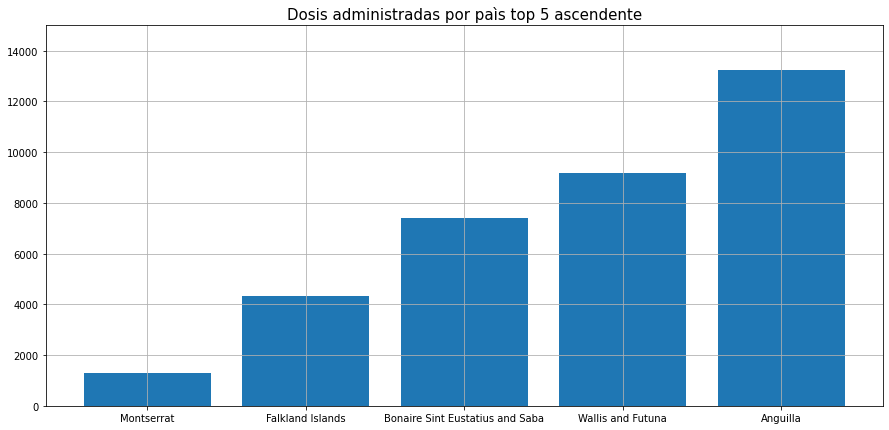

In [ ]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.bar(df_sna.sort_values('dosis_administradas',ascending=True).iloc[0:5,0],df_sna.sort_values('dosis_administradas',ascending=True).iloc[0:5,1])
plt.ylim(0, 15000)
plt.title('Dosis administradas por paìs top 5 ascendente',fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
df_sna[df_sna['pais'] == 'Mexico']

,pais,dosis_administradas,dosis_por_1000,porcentaje_de_vacunados,vacuna_utilizada
14,Mexico,47739783,378.3,15.8,"CanSino, Johnson&Johnson, Oxford/AstraZeneca, ..."


In [ ]:
sizes = [15, 100-15]
explode = (0.1, 0)
labels = ['vacunado', 'no vacunado']

Text(0.5, 1.0, 'Porcentaje de poblacion vacunada')

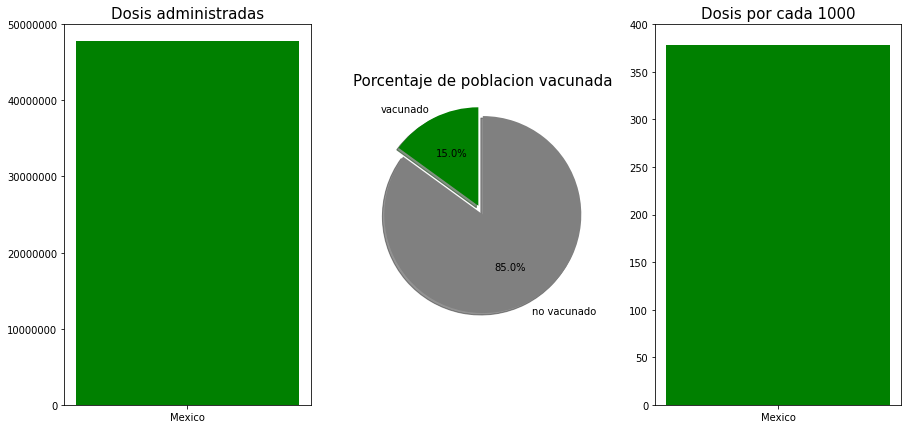

In [ ]:
figure, axes = plt.subplots(figsize = (15,7))
plt.subplot(131)
p1 = plt.bar(df_sna[df_sna['pais'] == 'Mexico'].iloc[0,0],df_sna[df_sna['pais'] == 'Mexico'].iloc[0,1], color = 'g')
plt.title('Dosis administradas', fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0,50000000)
 
plt.subplot(133)
p2 = plt.bar(df_sna[df_sna['pais'] == 'Mexico'].iloc[0,0], df_sna[df_sna['pais'] == 'Mexico'].iloc[0,2],color = 'g')
plt.title('Dosis por cada 1000',fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0,400)
 
plt.subplot(132)
p3 = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors= ['g','grey'])
plt.title('Porcentaje de poblacion vacunada',fontsize = 15)

In [ ]:
df[df['pais']=='World']

,pais,dosis_administradas,dosis_por_1000,porcentaje_de_vacunados,vacuna_utilizada
1,World,3755683809,494.5,13.7,NaN


In [ ]:
sizes1 = [df[df['pais']=='World'].iloc[0,3], 100-df[df['pais']=='World'].iloc[0,3]]

Text(0.5, 1.0, 'Porcentaje de poblacion vacunada')

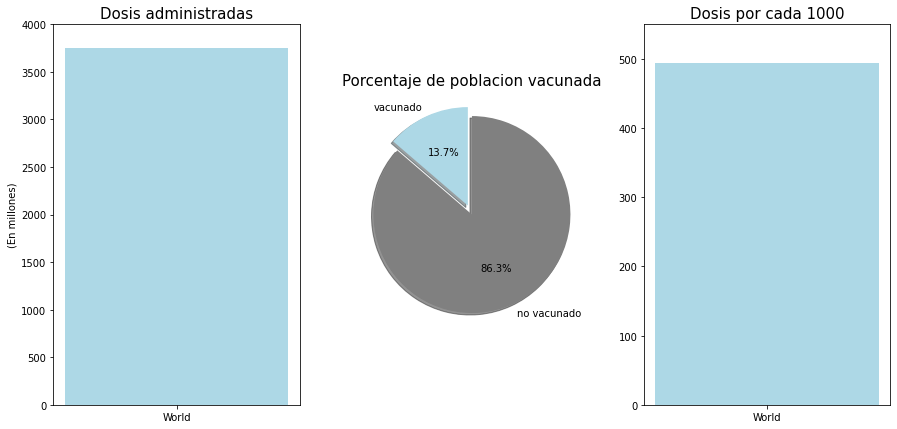

In [ ]:
figure, axes = plt.subplots(figsize = (15,7))
plt.subplot(131)
p1 = plt.bar(df[df['pais']=='World'].iloc[0,0],df[df['pais']=='World'].iloc[0,1]/1000000, color = 'lightblue')
plt.title('Dosis administradas',fontsize = 15)
plt.ylabel('(En millones)')
plt.ylim(0,4000)
plt.ticklabel_format(style='plain', axis='y')
 
plt.subplot(133)
p2 = plt.bar(df[df['pais']=='World'].iloc[0,0], df[df['pais']=='World'].iloc[0,2], color = 'lightblue')
plt.title('Dosis por cada 1000',fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0,550)
 
plt.subplot(132)
p3 = plt.pie(sizes1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['lightblue','grey'])
plt.title('Porcentaje de poblacion vacunada',fontsize = 15)

In [ ]:
df_sna['vacuna_utilizada'].value_counts()[0:5]
vacunas = ['Oxford/AstraZeneca','Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech','Oxford/AstraZeneca, Sinopharm/Beijing','Moderna, Oxford/AstraZeneca, Pfizer/BioNTech','Oxford/AstraZeneca, Pfizer/BioNTech']  

Text(0.5, 0, 'Cantidad de paises que la usan')

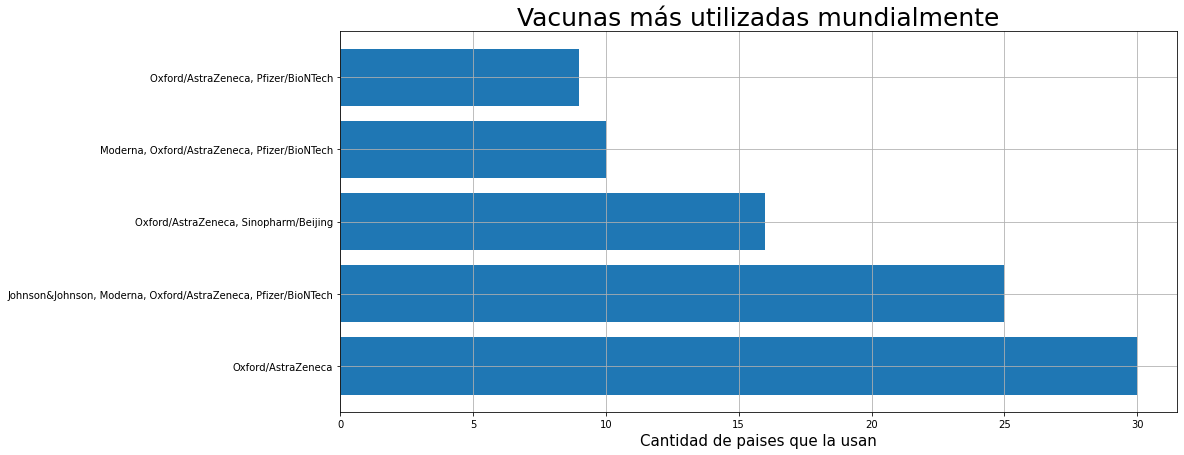

In [ ]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.barh(vacunas,df_sna['vacuna_utilizada'].value_counts()[0:5])
plt.title('Vacunas más utilizadas mundialmente',fontsize=25)
plt.xlabel('Cantidad de paises que la usan',fontsize=15)

In [ ]:
casos_mexico = pd.read_csv('/content/drive/MyDrive/machinelearning/COV19_GraficaCasosEstimados.csv')

In [ ]:
casos_mexico.tail(20)

,semana,estado,confirmados
60,2021-8,NACIONAL,37990
61,2021-9,NACIONAL,38402
62,2021-10,NACIONAL,29822
63,2021-11,NACIONAL,29290
64,2021-12,NACIONAL,24491
65,2021-13,NACIONAL,22071
66,2021-14,NACIONAL,24731
67,2021-15,NACIONAL,20570
68,2021-16,NACIONAL,19272
69,2021-17,NACIONAL,17217


In [ ]:
casos_mexico['confirmados'].max()

108697

Text(0, 0.5, 'Casos positivos')

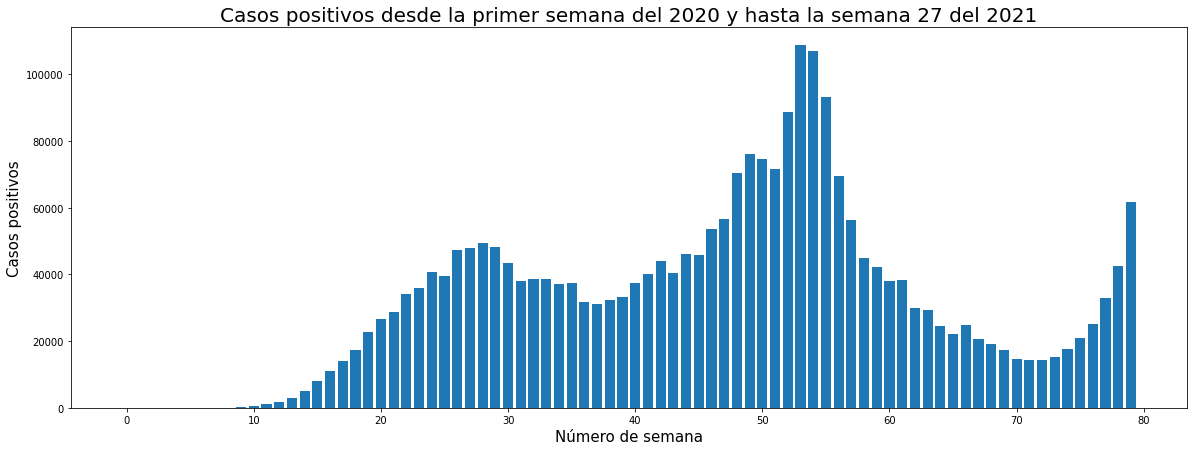

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(range(0,len(casos_mexico['confirmados'])), casos_mexico['confirmados'])
plt.title('Casos positivos desde la primer semana del 2020 y hasta la semana 27 del 2021', fontsize = 20)
plt.xlabel('Número de semana',fontsize = 15)
plt.ylabel('Casos positivos', fontsize = 15)

Presicion del modelo
0.992436070423968


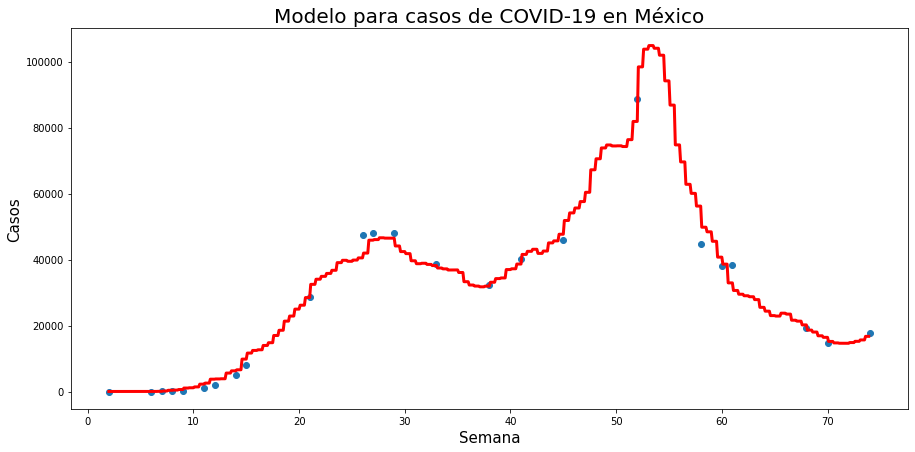

In [ ]:
dataX = np.arange(0,len(casos_mexico['confirmados'])).reshape(-1,1)
dataY = casos_mexico['confirmados']
X_train, X_test, y_train, y_test = train_test_split(dataX,dataY, test_size=0.3)
adr = RandomForestRegressor(n_estimators=1000,max_depth=15)
adr.fit(X_train, y_train)
Y_pred = adr.predict(X_test)
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
fig = plt.figure(figsize=(15,7))
plt.scatter(X_test, y_test)
plt.plot(X_grid, adr.predict(X_grid), color='red', linewidth=3)
plt.title('Modelo para casos de COVID-19 en México', fontsize = 20)
plt.xlabel('Semana', fontsize = 15)
plt.ylabel('Casos', fontsize = 15)
print('Presicion del modelo')
print(adr.score(X_train,y_train))

In [ ]:
X = np.arange(0,90).reshape(-1,1)
prediccion = adr.predict(X)
print(prediccion)

[1.59700000e+00 1.59700000e+00 1.59700000e+00 1.04300000e+00
 1.37200000e+00 1.13400000e+00 3.98900000e+00 2.88840000e+01
 9.79810000e+01 1.75387000e+02 4.92293000e+02 1.01643800e+03
 1.73052300e+03 2.76351400e+03 4.04582200e+03 6.32349000e+03
 8.01591100e+03 1.31583090e+04 2.25580660e+04 2.42835160e+04
 2.59955540e+04 2.85652760e+04 3.24424750e+04 3.53614220e+04
 3.99119710e+04 4.07695320e+04 4.54246770e+04 4.76511170e+04
 4.88260960e+04 4.78868600e+04 4.43320260e+04 4.04365990e+04
 3.90693090e+04 3.87493460e+04 3.67814460e+04 3.32748420e+04
 3.19015320e+04 3.15360810e+04 3.22124840e+04 3.34772120e+04
 3.63786280e+04 3.83491620e+04 3.85962870e+04 4.05627490e+04
 5.06104000e+04 5.55063120e+04 5.62548440e+04 5.79544560e+04
 6.74954940e+04 7.30830870e+04 7.47133540e+04 7.66896690e+04
 8.57907240e+04 9.96012990e+04 1.01301293e+05 9.27911710e+04
 8.05029340e+04 5.59816660e+04 4.77073950e+04 4.29746830e+04
 3.94611500e+04 3.87251220e+04 3.73070120e+04 2.90177100e+04
 2.56651840e+04 2.419250

Text(0.5, 1.0, 'Predicción para casos de COVID-19 en México')

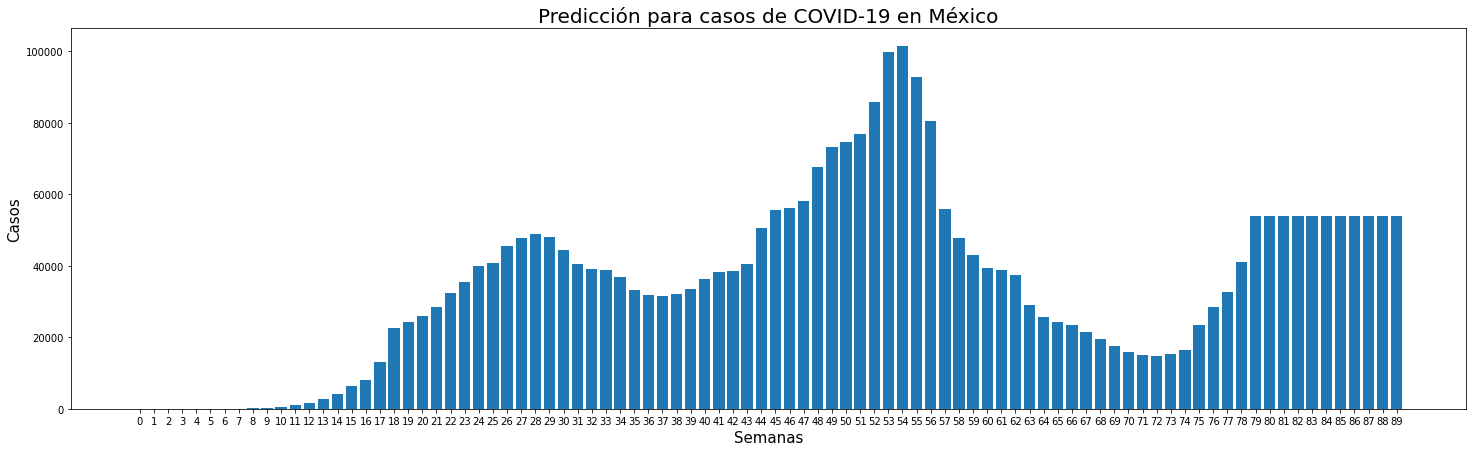

In [ ]:
plt.figure(figsize=(25,7))
plt.bar(np.arange(0,90),prediccion)
plt.xticks(np.arange(0,90))
plt.xlabel('Semanas', fontsize = 15)
plt.ylabel('Casos', fontsize = 15)
plt.title('Predicción para casos de COVID-19 en México', fontsize = 20)

In [ ]:
dataX = np.arange(0,len(casos_mexico['confirmados'])).reshape(-1,1)
dataY = casos_mexico['confirmados']
X_train, X_test, y_train, y_test = train_test_split(dataX,dataY, test_size=0.2)
modelo_tree = DecisionTreeRegressor(max_depth=9)
modelo_tree.fit(X_train.reshape(-1, 1), y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
prediccion_tree   = modelo_tree.predict(X_test)

Presicion del modelo
0.9884182902939327


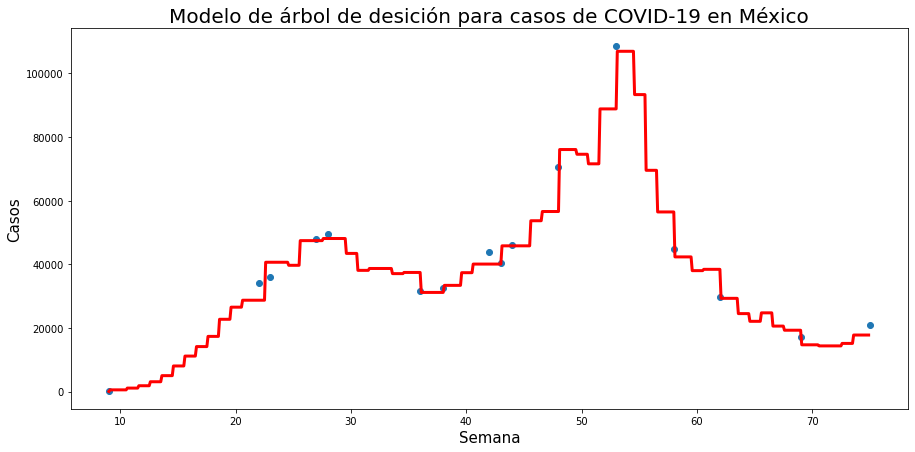

In [ ]:
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
fig = plt.figure(figsize=(15,7))
plt.scatter(X_test, y_test)
plt.plot(X_grid, modelo_tree.predict(X_grid), color='red', linewidth=3)
plt.title('Modelo de árbol de desición para casos de COVID-19 en México', fontsize = 20)
plt.xlabel('Semana', fontsize = 15)
plt.ylabel('Casos', fontsize = 15)
print('Presicion del modelo')
print(adr.score(X_train,y_train))

In [ ]:
X = np.arange(0,90).reshape(-1,1)
prediccion = modelo_tree.predict(X)
print(prediccion)

[0.00000e+00 6.00000e-01 6.00000e-01 6.00000e-01 6.00000e-01 6.00000e-01
 2.00000e+00 6.00000e+00 2.00000e+01 2.00000e+01 5.37000e+02 1.09300e+03
 1.83100e+03 3.08500e+03 5.00200e+03 8.04300e+03 1.11490e+04 1.41320e+04
 1.73350e+04 2.27100e+04 2.65150e+04 2.86980e+04 2.86980e+04 4.06270e+04
 4.06270e+04 3.96680e+04 4.74190e+04 4.74190e+04 4.80850e+04 4.80850e+04
 4.34020e+04 3.80790e+04 3.86690e+04 3.86690e+04 3.70530e+04 3.74220e+04
 3.74220e+04 3.11470e+04 3.11470e+04 3.33650e+04 3.73470e+04 4.00540e+04
 4.00540e+04 4.00540e+04 4.57850e+04 4.57850e+04 5.36670e+04 5.65680e+04
 5.65680e+04 7.60380e+04 7.45550e+04 7.15480e+04 8.88030e+04 8.88030e+04
 1.06901e+05 9.32970e+04 6.95110e+04 5.64290e+04 5.64290e+04 4.23080e+04
 3.79900e+04 3.84020e+04 3.84020e+04 2.92900e+04 2.44910e+04 2.20710e+04
 2.47310e+04 2.05700e+04 1.92720e+04 1.92720e+04 1.46890e+04 1.43485e+04
 1.43485e+04 1.51280e+04 1.77620e+04 1.77620e+04 2.51390e+04 3.28070e+04
 4.26190e+04 6.17880e+04 6.17880e+04 6.17880e+04 6.

Text(0, 0.5, 'Casos')

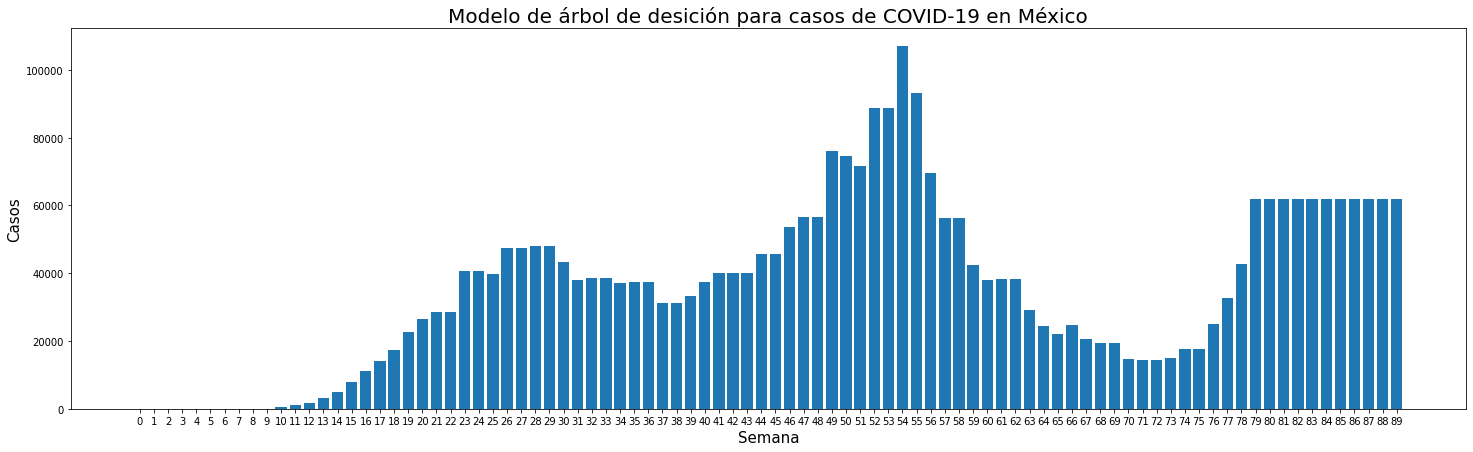

In [ ]:
plt.figure(figsize=(25,7))
plt.bar(np.arange(0,90),prediccion)
plt.xticks(np.arange(0,90))
plt.title('Modelo de árbol de desición para casos de COVID-19 en México', fontsize = 20)
plt.xlabel('Semana', fontsize = 15)
plt.ylabel('Casos', fontsize = 15)